In [1]:
%matplotlib inline

In [6]:
from load_small_fits import load_nbody
bolshoi_bn = "pentest_bpl_small2.h5"
bolshoi_bn2 = "bpl_diffmah_cens_small.npy"
mdpl_bn = "pentest_mdpl_small.h5"
mdpl2_bn2 = "um_histories_dr1_mdpl2_small_cens.npy"
bpl, mdpl, t_b, t_m = load_nbody(bolshoi_bn, bolshoi_bn2, mdpl_bn, mdpl2_bn2)
bpl['lge'] = np.log10(bpl['early_index'])
bpl['lgl'] = np.log10(bpl['late_index'])
mdpl['lge'] = np.log10(mdpl['early_index'])
mdpl['lgl'] = np.log10(mdpl['late_index'])
print(bpl.keys())

['early_index', 'halo_id', 'late_index', 'logmp_fit', 'loss', 'mah_k', 'mah_x0', 'tmpeak', 'u_mah_x0', 'u_mah_k', 'u_early_index', 'u_late_index', 'x', 'y', 'z', 'vmax', 'conc', 'upid', 'logm_sim', 'a_firstacc', 'tidal_force_tdyn', 'log_mah_sim', 'logmp_sim', 'dmhdt_fit', 'log_mah_fit', 't04_sim', 't25_sim', 't50_sim', 't80_sim', 't04_fit', 't25_fit', 't50_fit', 't80_fit', 't04_fit2', 't25_fit2', 't50_fit2', 't80_fit2', 'pop1', 'lge', 'lgl']


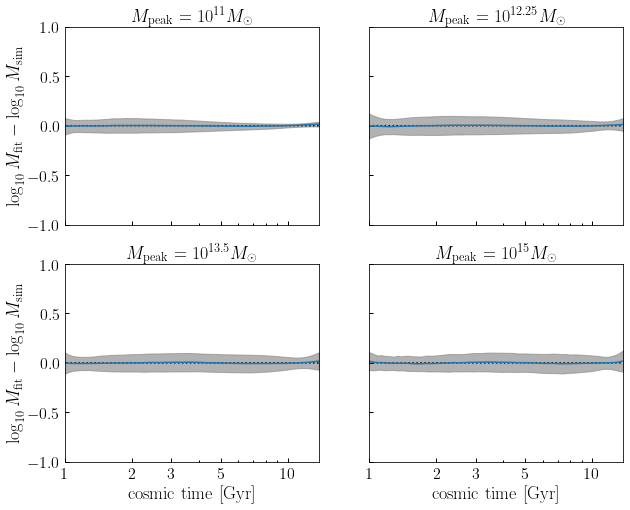

In [3]:
from measure_fitting_errors import measure_fitting_residuals
from matplotlib import ticker

dlgm_min = 2.5
lgm_mins = (10, 10, 11.25, 11.25)

fig, _axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
((ax0, ax1), (ax2, ax3)) = _axes

axes = ax0, ax1, ax2, ax3
lgmploot = (11., 12.25, 13.5, 15)
hlist = (bpl, bpl, mdpl, mdpl)
tlist = (t_b, t_b, t_m, t_m)

titles = (r'$M_{\rm peak}=10^{11}M_{\odot}$', r'$M_{\rm peak}=10^{12.25}M_{\odot}$',
         r'$M_{\rm peak}=10^{13.5}M_{\odot}$', r'$M_{\rm peak}=10^{15}M_{\odot}$')

gen = zip(lgmploot, axes, hlist, tlist, titles, lgm_mins)

for lgm, ax, h, t, title, lgm_min in gen:
    xscale = ax.set_xscale('log')
    xlim = ax.set_xlim(1, 13.8)
    ylim = ax.set_ylim(-1, 1)

    mmsk = np.abs(h['logmp_sim'] - lgm) < 0.2
    avg_error, std_error = measure_fitting_residuals(
        t, h['log_mah_sim'][mmsk], h['log_mah_fit'][mmsk], lgm_min, dlgm_min)
    
    __=ax.plot(np.logspace(-2, 2, 5000), np.zeros(5000), ':', color='k')
    __=ax.fill_between(t, avg_error-std_error, avg_error+std_error, color='gray', alpha=0.6)
    __=ax.plot(t, avg_error)
    __=ax.set_xticks((1, 2, 3, 5, 10))
    __=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    __=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
    __=ax.set_title(title)

for ax in (ax2, ax3):
    xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')

for ax in (ax0, ax2):
    ylabel = ax.set_ylabel(r'$\log_{10}M_{\rm fit} - \log_{10}M_{\rm sim}$')

fig.savefig('individual_halo_mah_residuals_nbody.png', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)

In [4]:
from load_small_fits import load_tng
tng_bn = "pentest_tng_small.h5"
tng_bn2 = "tng_small.npy"
tng, t_t = load_tng(tng_bn, tng_bn2)

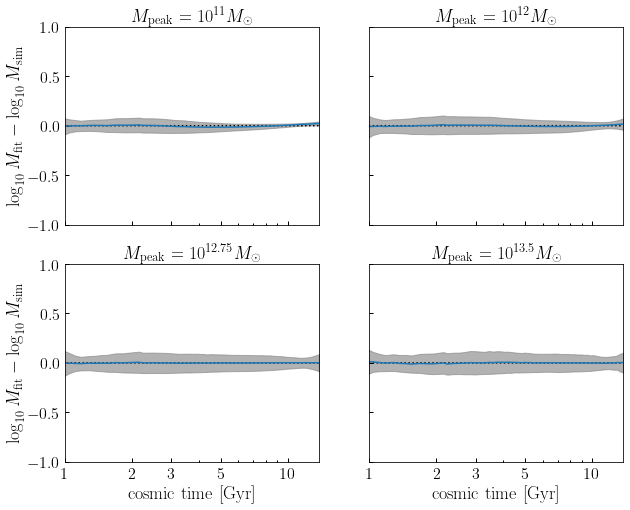

In [5]:
from measure_fitting_errors import measure_fitting_residuals
from matplotlib import ticker

dlgm_min = 2.5
lgm_mins = (10, 10, 10, 10)

fig, _axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
((ax0, ax1), (ax2, ax3)) = _axes

axes = ax0, ax1, ax2, ax3
lgmploot = (11, 12., 12.75, 13.5)
hlist = (tng, tng, tng, tng)
tlist = (t_t, t_t, t_t, t_t)

titles = (r'$M_{\rm peak}=10^{11}M_{\odot}$', r'$M_{\rm peak}=10^{12}M_{\odot}$',
         r'$M_{\rm peak}=10^{12.75}M_{\odot}$', r'$M_{\rm peak}=10^{13.5}M_{\odot}$')

gen = zip(lgmploot, axes, hlist, tlist, titles, lgm_mins)

for lgm, ax, h, t, title, lgm_min in gen:
    xscale = ax.set_xscale('log')
    xlim = ax.set_xlim(1, 13.8)
    ylim = ax.set_ylim(-1, 1)

    mmsk = np.abs(h['logmp_sim'] - lgm) < 0.2
    avg_error, std_error = measure_fitting_residuals(
        t, h['log_mah_sim'][mmsk], h['log_mah_fit'][mmsk], lgm_min, dlgm_min)
    
    __=ax.plot(np.logspace(-2, 2, 5000), np.zeros(5000), ':', color='k')
    __=ax.fill_between(t, avg_error-std_error, avg_error+std_error, color='gray', alpha=0.6)
    __=ax.plot(t, avg_error)
    __=ax.set_xticks((1, 2, 3, 5, 10))
    __=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    __=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
    __=ax.set_title(title)

for ax in (ax2, ax3):
    xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')

for ax in (ax0, ax2):
    ylabel = ax.set_ylabel(r'$\log_{10}M_{\rm fit} - \log_{10}M_{\rm sim}$')

fig.savefig('individual_halo_mah_residuals_tng.png', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)